In [1]:
import os
from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATA = '_all_merged.csv'
PATH_TO_SAVE_CLEAN_DATA = '_clean_all_merged.csv'
CONVERT_TO_LIST_COLUMNS = ['train_accs', 'val_accs']

df = pd.read_csv(PATH_TO_DATA)
for conv_to_list_col in CONVERT_TO_LIST_COLUMNS:
    df[conv_to_list_col] = df[conv_to_list_col].apply(literal_eval)

print('Columns avaialable are: ' + ', '.join(df.columns))

Columns avaialable are: arch_i, arch_str, grad_norm, snip, grasp, fisher, jacob_cov, plain, synflow_bn, synflow, train_accs, val_accs


### Looking at percentage of NaNs per column

In [3]:
def plot_nans_perc_per_column(df: pd.DataFrame):
    """
    Plots sorted percentage of NaNs per column in df
    """
    def get_amount_of_nans_in_array_col(data: pd.Series):
        amount_data, amount_nans = 0, 0
        for accs_arr in data:
            amount_data += len(accs_arr)
            amount_nans += np.isnan(accs_arr).sum()

        return amount_nans, amount_data

        
    nans_percs = {}

    for col_name in df.columns:
        
        # If values in cells are arrays
        if col_name in ['train_accs', 'val_accs']:
            amount_data, amount_nans = 0, 0
            for accs_arr in df[col_name]:
                amount_data += len(accs_arr)
                amount_nans += np.isnan(accs_arr).sum()

            nans_percs[col_name] = amount_nans / amount_data * 100

        else:
            nans_percs[col_name] = df[col_name].isna().sum() / len(df) * 100

    nans_percs = dict(sorted(nans_percs.items(), key=lambda item: item[1], reverse=True))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.bar(nans_percs.keys(), nans_percs.values())
    ax.set_ylabel('Percentage of NaN values [%]')
    ax.set_xlabel('Feature in question')

    plt.show()

    for k, v in nans_percs.items():
        print(f'Column {k} has {v}% NaNs')

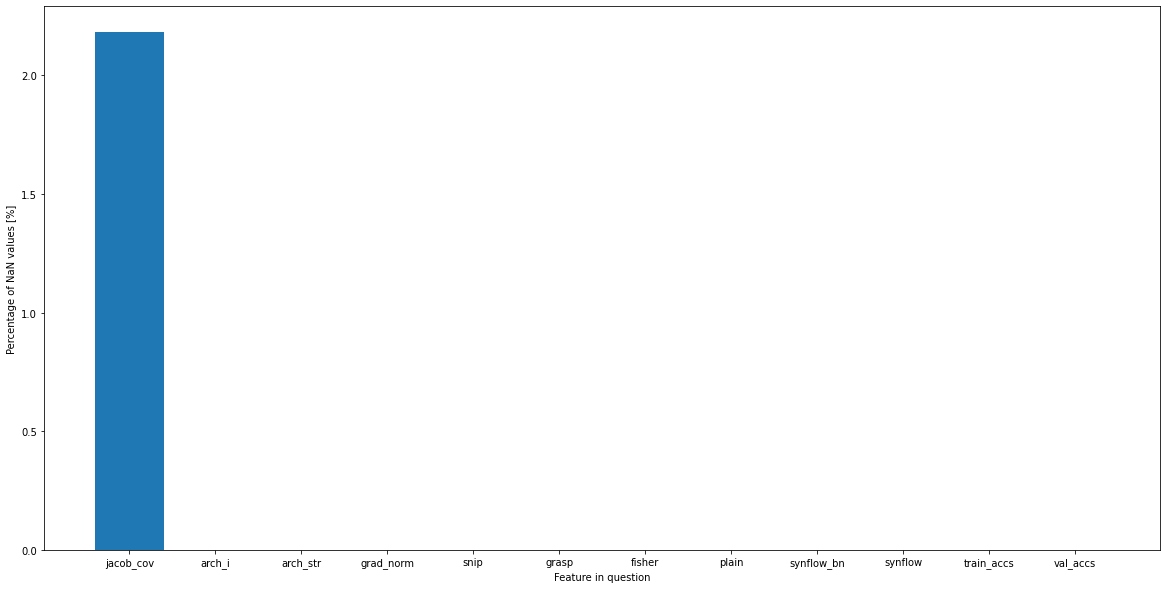

Column jacob_cov has 2.1824% NaNs
Column arch_i has 0.0% NaNs
Column arch_str has 0.0% NaNs
Column grad_norm has 0.0% NaNs
Column snip has 0.0% NaNs
Column grasp has 0.0% NaNs
Column fisher has 0.0% NaNs
Column plain has 0.0% NaNs
Column synflow_bn has 0.0% NaNs
Column synflow has 0.0% NaNs
Column train_accs has 0.0% NaNs
Column val_accs has 0.0% NaNs


In [4]:
plot_nans_perc_per_column(df)

### We see there can be missing values in columns. Therefore we will fill those NaNs

In [5]:
def fill_NaNs_with_median(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fills NaNs in column wise basis according to column's median.
    Doesn't include columns 'arch_i', 'arch_str', 'train_accs', 'val_accs'
    """
    for col in df.columns:

        # Skip such columns
        if col in ['arch_i', 'arch_str', 'train_accs', 'val_accs']:
            continue
        
        df[col] = df[col].fillna(df[col].median())

    return df

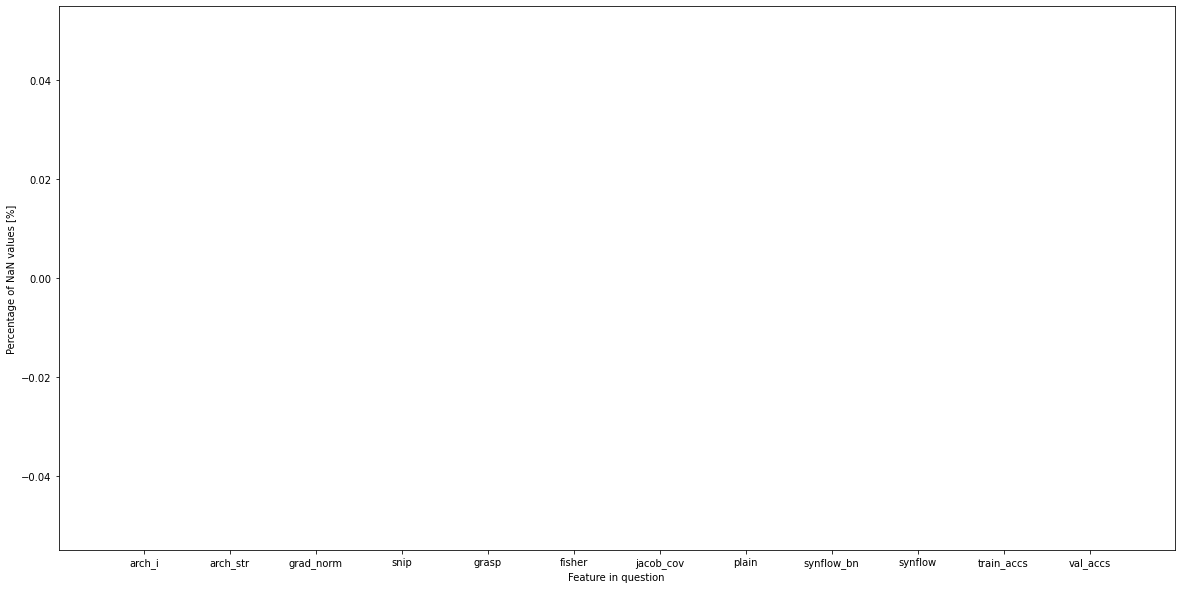

Column arch_i has 0.0% NaNs
Column arch_str has 0.0% NaNs
Column grad_norm has 0.0% NaNs
Column snip has 0.0% NaNs
Column grasp has 0.0% NaNs
Column fisher has 0.0% NaNs
Column jacob_cov has 0.0% NaNs
Column plain has 0.0% NaNs
Column synflow_bn has 0.0% NaNs
Column synflow has 0.0% NaNs
Column train_accs has 0.0% NaNs
Column val_accs has 0.0% NaNs


In [6]:
df_clean = fill_NaNs_with_median(df.copy())
plot_nans_perc_per_column(df_clean)

In [7]:
# Save aquired clean file
df_clean.to_csv(PATH_TO_SAVE_CLEAN_DATA, index=False)